<a href="https://colab.research.google.com/github/seher13/StockData/blob/main/Coursera_Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to create a graph showing Tesla and GameStop Stock value and revenue Data.
We use yfinance for getting stock price and webscrapping to get revenue data (possible source: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue)

1. Get historical stock value of Tesla

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install yfinance==0.1.67

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf

In [5]:
tesla = yf.Ticker('TSLA')

In [6]:
tesla_stock_value = tesla.history(period='max')

In [7]:
tesla_stock_value = tesla_stock_value.reset_index()
tesla_stock_value.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


2. Web scrap revenue of Tesla

In [8]:
import requests
from bs4 import BeautifulSoup
import re

In [9]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')
tables = soup.find_all('table', attrs={'class':'historical_data_table table'})

In [10]:
len(tables)

4

In [11]:
tesla_revenue = pd.read_html(str(tables[1]))[0]

In [12]:
tesla_revenue.head()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2021-12-31,"$17,719"
1,2021-09-30,"$13,757"
2,2021-06-30,"$11,958"
3,2021-03-31,"$10,389"
4,2020-12-31,"$10,744"


In [13]:
tesla_revenue.columns

Index(['Tesla Quarterly Revenue(Millions of US $)', 'Tesla Quarterly Revenue(Millions of US $).1'], dtype='object')

In [14]:
tesla_revenue_renamed = tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)':'Date', 'Tesla Quarterly Revenue(Millions of US $).1':'Tesla Quarterly Revenue(Millions of US $)'})

In [15]:
tesla_revenue_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date                                       51 non-null     object
 1   Tesla Quarterly Revenue(Millions of US $)  50 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [16]:
# Change data type to datetime and integer

tesla_revenue_renamed['Date'] = pd.to_datetime(tesla_revenue_renamed['Date'])
tesla_revenue_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date                                       51 non-null     datetime64[ns]
 1   Tesla Quarterly Revenue(Millions of US $)  50 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 944.0+ bytes


In [17]:
#Replace $
#https://datatofish.com/replace-character-pandas-dataframe/
tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'] = tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'] = tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'].str.replace(',','')

In [19]:
tesla_revenue_renamed.head()

,Date,Tesla Quarterly Revenue(Millions of US $)
0,2021-12-31,17719
1,2021-09-30,13757
2,2021-06-30,11958
3,2021-03-31,10389
4,2020-12-31,10744


In [20]:
tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'] = pd.to_numeric(tesla_revenue_renamed['Tesla Quarterly Revenue(Millions of US $)'])

In [21]:
tesla_revenue_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date                                       51 non-null     datetime64[ns]
 1   Tesla Quarterly Revenue(Millions of US $)  50 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 944.0 bytes


In [41]:
tesla_revenue_renamed.tail()

,Date,Tesla Quarterly Revenue(Millions of US $)
46,2010-06-30,28.0
47,2010-03-31,21.0
48,2009-12-31,NaN
49,2009-09-30,46.0
50,2009-06-30,27.0


GameStop stock value

In [22]:
GameStop = yf.Ticker('GME')

In [23]:
GameStop_stock_value = GameStop.history(start='2009-01-01')

In [42]:
GameStop_stock_value = GameStop_stock_value.reset_index()
GameStop_stock_value.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2009-01-02,14.630813,15.990880,14.166237,15.613832,3490900,0.0,0
1,2009-01-05,15.647495,16.489121,15.485904,16.044743,3409400,0.0,0
2,2009-01-06,16.192870,16.516055,15.586900,15.836021,3466500,0.0,0
3,2009-01-07,15.768688,15.768688,14.987660,15.223315,2780700,0.0,0
4,2009-01-08,16.623784,17.606801,15.485906,17.223021,10538000,0.0,0


GameStop Revenue WebScrapping

In [25]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')
tablesGS = soup.find_all('table', attrs={'class':'historical_data_table table'})

In [26]:
len(tablesGS)

4

In [27]:
GameStop_revenue = pd.read_html(str(tablesGS[1]))[0]

In [28]:
GameStop_revenue.columns

Index(['GameStop Quarterly Revenue(Millions of US $)', 'GameStop Quarterly Revenue(Millions of US $).1'], dtype='object')

In [29]:
GameStop_revenue_renamed = GameStop_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)':'Date', 'GameStop Quarterly Revenue(Millions of US $).1':'GameStop Quarterly Revenue(Millions of US $)'})

In [30]:
GameStop_revenue_renamed.head()

,Date,GameStop Quarterly Revenue(Millions of US $)
0,2021-10-31,"$1,297"
1,2021-07-31,"$1,183"
2,2021-04-30,"$1,277"
3,2021-01-31,"$2,122"
4,2020-10-31,"$1,005"


In [31]:
# Change data type to datetime and integer

GameStop_revenue_renamed['Date'] = pd.to_datetime(tesla_revenue_renamed['Date'])
GameStop_revenue_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Date                                          51 non-null     datetime64[ns]
 1   GameStop Quarterly Revenue(Millions of US $)  52 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 960.0+ bytes


In [32]:
#Replace $
#https://datatofish.com/replace-character-pandas-dataframe/
GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'] = GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#Replace ','
GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'] = GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'].str.replace(',','')

In [34]:
GameStop_revenue_renamed.head()

,Date,GameStop Quarterly Revenue(Millions of US $)
0,2021-12-31,1297
1,2021-09-30,1183
2,2021-06-30,1277
3,2021-03-31,2122
4,2020-12-31,1005


In [35]:
GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'] = pd.to_numeric(GameStop_revenue_renamed['GameStop Quarterly Revenue(Millions of US $)'])

In [36]:
GameStop_revenue_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Date                                          51 non-null     datetime64[ns]
 1   GameStop Quarterly Revenue(Millions of US $)  52 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [37]:
GameStop_revenue_renamed.head()

,Date,GameStop Quarterly Revenue(Millions of US $)
0,2021-12-31,1297
1,2021-09-30,1183
2,2021-06-30,1277
3,2021-03-31,2122
4,2020-12-31,1005


In [46]:
GameStop_revenue_renamed.tail()

,Date,GameStop Quarterly Revenue(Millions of US $)
47,2010-03-31,3524
48,2009-12-31,1835
49,2009-09-30,1739
50,2009-06-30,1981
51,NaT,3492


Plotting 

Text(0.5, 1.0, 'Tesla vs. Gamestock Stock value and Revenue comparisson over years')

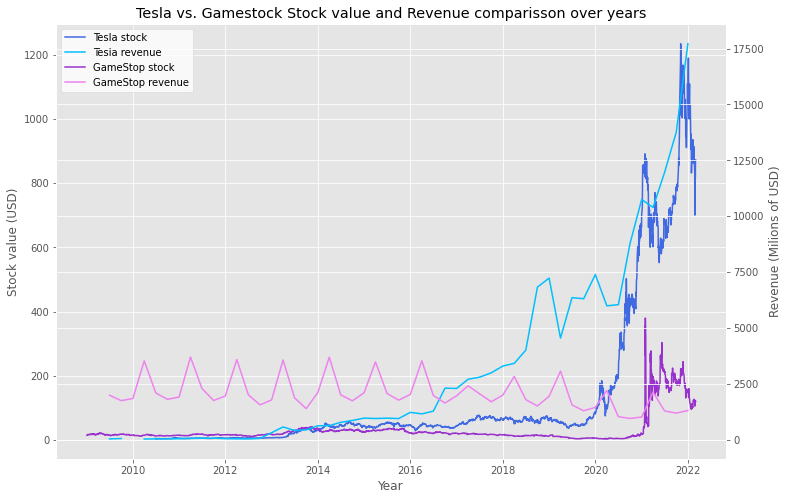

In [44]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


lns1 = ax1.plot(tesla_stock_value.iloc[:,0], tesla_stock_value.iloc[:,1], color='royalblue', label='Tesla stock')
lns2 = ax2.plot(tesla_revenue_renamed.iloc[:,0], tesla_revenue_renamed.iloc[:,1], color='deepskyblue', label='Tesla revenue')

lns3 = ax1.plot(GameStop_stock_value.iloc[:,0], GameStop_stock_value.iloc[:,1], color='darkorchid', label='GameStop stock')
lns4 = ax2.plot(GameStop_revenue_renamed.iloc[:,0], GameStop_revenue_renamed.iloc[:,1], color='violet', label='GameStop revenue')

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, facecolor='white')

ax1.set_xlabel('Year')
ax1.set_ylabel('Stock value (USD)')
ax2.set_ylabel('Revenue (Milions of USD)')
ax1.set_title('Tesla vs. Gamestock Stock value and Revenue comparisson over years')

Conclusion: Tesla stock is relatively correlated with the growth of Tesla revenue. However, GameStop Stock was not correleated in 2021 due to reddit channel WallStreetBets.